In [1]:
import talib
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce
import quandl
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from datetime import datetime
import selenium

In [2]:
from fake_useragent import UserAgent
ua = UserAgent()

ua.ie
# Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US);
ua.msie
# Mozilla/5.0 (compatible; MSIE 10.0; Macintosh; Intel Mac OS X 10_7_3; Trident/6.0)'
ua['Internet Explorer']
# Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; GTB7.4; InfoPath.2; SV1; .NET CLR 3.3.69573; WOW64; en-US)
ua.opera
# Opera/9.80 (X11; Linux i686; U; ru) Presto/2.8.131 Version/11.11
ua.chrome
# Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.2 (KHTML, like Gecko) Chrome/22.0.1216.0 Safari/537.2'
ua.google
# Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4) AppleWebKit/537.13 (KHTML, like Gecko) Chrome/24.0.1290.1 Safari/537.13
ua['google chrome']
# Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11
ua.firefox
# Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16.0.1) Gecko/20121011 Firefox/16.0.1
ua.ff
# Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0) Gecko/20100101 Firefox/15.0.1
ua.safari
# Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25

# and the best one, random via real world browser usage statistic
ua.random

'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36'

In [3]:
hzo = yf.Ticker("HZO")

start_date = datetime(1998, 6, 3)
test_date = datetime(1998, 6, 17)
end_date = datetime(2021, 9, 20)

# get stock info
hzo.info

data = hzo.history(start = start_date)

# get historical market data
hist = hzo.history(period="max")

hist2 = hist[14:]

#hist = hist.drop(labels = ['Low','Dividends','Stock Splits'], axis = 1)


hist2 = pd.DataFrame(hist2)


dog0 = hist2['Close'].iloc[0:5852]

dog0 = pd.DataFrame(dog0)

print(dog0)


dog1 = hist2['Close'].iloc[1:5853]

dog1 = pd.DataFrame(dog1)

print(dog1)


dog1=  pd.DataFrame(dog1).values
dog0= pd.DataFrame(dog0).values


dog2 = (((dog1 - dog0)/dog1) * 100)
dog2 = pd.DataFrame(dog2)
dog2.columns =['% Change in Price']

#datelist = pd.DataFrame(datelist)

#dog1['Date'] = [datelist]
#dog1['Date'] = [datetime(1998,6,24)]



#pd.date_range(end = datetime.today(), periods = 5852).to_pydatetime().tolist()

#dog1['Date'] = [pd.date_range]

#date_from = pd.Timestamp(date(1998,6,24))
#date_to = pd.Timestamp(date(2021,9,24))

#dog1['Date'] = [date_from, date_to]    
    
dog2


                Close
Date                 
1998-06-23  12.625000
1998-06-24  12.500000
1998-06-25  12.500000
1998-06-26  12.500000
1998-06-29  12.500000
...               ...
2021-09-17  50.110001
2021-09-20  48.470001
2021-09-21  47.549999
2021-09-22  49.840000
2021-09-23  51.099998

[5852 rows x 1 columns]
                Close
Date                 
1998-06-24  12.500000
1998-06-25  12.500000
1998-06-26  12.500000
1998-06-29  12.500000
1998-06-30  12.375000
...               ...
2021-09-20  48.470001
2021-09-21  47.549999
2021-09-22  49.840000
2021-09-23  51.099998
2021-09-24  50.070000

[5852 rows x 1 columns]


,% Change in Price
0,-1.000000
1,0.000000
2,0.000000
3,0.000000
4,-1.010101
...,...
5847,-3.383535
5848,-1.934810
5849,4.594705
5850,2.465750


In [4]:
hist2 = hist2[1:].values

hist2 = pd.DataFrame(hist2)

hist2 = pd.concat([hist2,dog2],axis=1)

hist2 = hist2.drop(5,axis=1)
hist2 = hist2.drop(6,axis=1)
hist2 = hist2.drop(1,axis=1)
hist2 = hist2.drop(0,axis=1)
hist2 = hist2.drop(2,axis=1)

#hist2.columns[3] = ['Close']

#hist3.columns[4] = ['Volume']
hist2

,3,4,% Change in Price
0,12.500000,11900.0,-1.000000
1,12.500000,22200.0,0.000000
2,12.500000,83400.0,0.000000
3,12.500000,13400.0,0.000000
4,12.375000,101300.0,-1.010101
...,...,...,...
5851,50.070000,220700.0,-2.057118
5852,51.130001,213600.0,NaN
5853,49.560001,228900.0,NaN
5854,50.200001,120800.0,NaN


In [5]:
rsi = talib.RSI(data["Open"])

print(rsi[14:])

rsi = rsi[14:].values

rsi = pd.DataFrame(rsi)

print(rsi)

hist2 = pd.concat([hist2,rsi],axis=1)

hist2 = pd.DataFrame(hist2)

hist2

Date
1998-06-23    52.000000
1998-06-24    50.903614
1998-06-25    49.773448
1998-06-26    49.773448
1998-06-29    49.773448
                ...    
2021-09-24    54.811753
2021-09-27    53.937280
2021-09-28    56.292539
2021-09-29    53.475938
2021-09-30    51.459335
Length: 5857, dtype: float64
              0
0     52.000000
1     50.903614
2     49.773448
3     49.773448
4     49.773448
...         ...
5852  54.811753
5853  53.937280
5854  56.292539
5855  53.475938
5856  51.459335

[5857 rows x 1 columns]


,3,4,% Change in Price,0
0,12.500000,11900.0,-1.000000,52.000000
1,12.500000,22200.0,0.000000,50.903614
2,12.500000,83400.0,0.000000,49.773448
3,12.500000,13400.0,0.000000,49.773448
4,12.375000,101300.0,-1.010101,49.773448
...,...,...,...,...
5852,51.130001,213600.0,NaN,54.811753
5853,49.560001,228900.0,NaN,53.937280
5854,50.200001,120800.0,NaN,56.292539
5855,48.520000,271454.0,NaN,53.475938


4                   -0.035484
0                    0.005151
3                    0.039243
% Change in Price    1.000000
Name: % Change in Price, dtype: float64

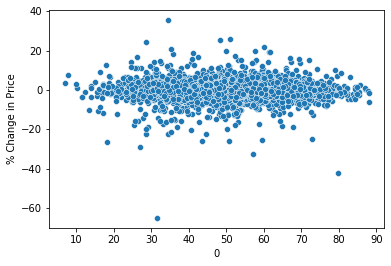

In [6]:
sns.scatterplot(y='% Change in Price',x=0,data=hist2)


hist2.corr()['% Change in Price'].sort_values()

4                   -0.035484
0                    0.005151
obv                  0.037080
3                    0.039243
% Change in Price    1.000000
Name: % Change in Price, dtype: float64

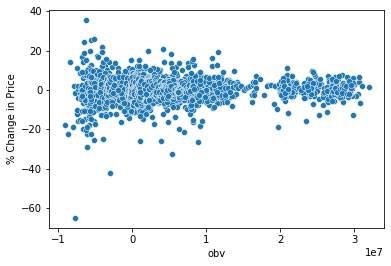

In [7]:
Open = hist2[3]
Volume = hist2[4]


obv = talib.OBV(Open, Volume)

obv = pd.DataFrame(obv)

obv.columns =['obv']

obv

hist2 = pd.concat([hist2,obv],axis=1)

hist2

sns.scatterplot(y='% Change in Price',x='obv',data=hist2)

hist2.corr()['% Change in Price'].sort_values()

In [8]:
High = hist['High']
Close = hist['Close']
Volume = hist['Volume']
Low = hist['Low']
Open = hist['Open']

real = talib.ADOSC(High, Low, Close, Volume, fastperiod=3, slowperiod=10)

real = pd.DataFrame(real[14:])

real = pd.DataFrame(real)

real.columns = ['ADOSC']

real

,ADOSC
Date,
1998-06-23,-21135.146693
1998-06-24,-23704.778374
1998-06-25,-22601.011482
1998-06-26,-46631.196710
1998-06-29,-56486.163693
...,...
2021-09-24,69451.179365
2021-09-27,44746.128194
2021-09-28,-31150.177337


In [9]:
hzo.info

{'zip': '33759',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 1736,
 'longBusinessSummary': 'MarineMax, Inc. operates as a recreational boat and yacht retailer in the United States. The company sells new and used recreational boats, including pleasure boats, boats, and sport cruisers; mega-yachts, sport yachts, and other yachts; fishing boats; motor and convertible yachts; pontoon boats; fishing boats; ski boats; and jet boats. It also provides marine parts and accessories comprising marine electronics; dock and anchoring products that include boat fenders, lines, and anchors; boat covers; trailer parts; water sport accessories, which comprise tubes, lines, wakeboards, and skis; engine parts; oils; lubricants; steering and control systems; corrosion control products and service products; high-performance accessories, including propellers and instruments; and a line of boating accessories, such as life jackets, inflatables, and water sports equipment. In addition, the company o

In [10]:
#hzo('profitMargins')

In [11]:
#quandl.get("BATS/BYXX_HZO", authtoken="pMCuXkGLyHZvBEPnRk75")

In [12]:
#unemployment = quandl.get("FRED/NROUST", authtoken="pMCuXkGLyHZvBEPnRk75")

#unemployment[:]

In [13]:
#X = pd.DataFrame(df['obv'].values)
#y = pd.DataFrame(df['Close'].values)

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [16]:
#model = Sequential()

#model.add(Dense(1,activation='relu'))

#model.add(Dense(1))

#model.compile(optimizer='adam',loss='mse')

In [17]:
#from keras.callbacks import History 
#history = History()

#early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=20, restore_best_weights=True)

#EarlyStopping()
#model.fit(x= X_train,y= y_train,validation_data = (X_test,y_test),batch_size=56,epochs=100)

In [18]:
#loss = pd.DataFrame(model.history.history)

In [19]:
#loss.plot()

In [20]:
dot = talib.ROC(Close,timeperiod=1)

rsi2 = talib.RSI(data["Close"],timeperiod= 2)

In [21]:
dot = dot[34:]

dot = pd.DataFrame(dot)

dot.columns = ['ROC']

dot

,ROC
Date,
1998-07-22,1.063830
1998-07-23,-2.631579
1998-07-24,-3.783784
1998-07-27,-2.808989
1998-07-28,0.578035
...,...
2021-09-24,-2.015653
2021-09-27,2.117039
2021-09-28,-3.070604


In [22]:
rsi2 = pd.DataFrame(rsi2[34:])

rsi2.columns =['RSI']

Mod = pd.concat([dot,rsi2],axis=1)

Mod


,ROC,RSI
Date,,
1998-07-22,1.063830,78.329799
1998-07-23,-2.631579,22.037117
1998-07-24,-3.783784,7.315821
1998-07-27,-2.808989,3.743413
1998-07-28,0.578035,19.472459
...,...,...
2021-09-24,-2.015653,49.923042
2021-09-27,2.117039,72.916505
2021-09-28,-3.070604,30.894747


<AxesSubplot:xlabel='RSI', ylabel='ROC'>

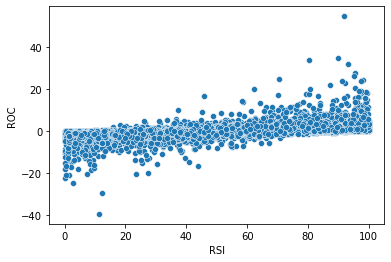

In [23]:
sns.scatterplot(y='ROC',x='RSI',data=Mod)

In [24]:
#mom = talib.MOM(data['Open'])
#mom = pd.DataFrame(mom[34:])
#mom.columns = ['Momentum']

#mom

In [25]:
#Mod = pd.concat([Mod,mom],axis=1)

#Mod

In [26]:
#PPO = talib.PPO(data['Open'], slowperiod = 3, fastperiod = 2, matype = 1 )

#PPO = pd.DataFrame(PPO[34:])
#PPO.columns = ['PPO']

#Mod = pd.concat([Mod,PPO],axis=1)

#Mod

In [27]:
MFI2 = talib.MFI(High, Low, Close, Volume,timeperiod=2)

MFI2 = pd.DataFrame(MFI2[34:])

MFI2.columns = ['MFI 2']

Mod = pd.concat([Mod,MFI2],axis=1)

MFI3 = talib.MFI(High, Low, Close, Volume,timeperiod=3)

MFI3 = pd.DataFrame(MFI3[34:])

MFI3.columns = ['MFI 3']

Mod = pd.concat([Mod,MFI3],axis=1)

Mod

,ROC,RSI,MFI 2,MFI 3
Date,,,,
1998-07-22,1.063830,78.329799,1.071224e-14,3.919543e+01
1998-07-23,-2.631579,22.037117,8.020899e-15,8.020899e-15
1998-07-24,-3.783784,7.315821,5.923841e-15,3.814457e-15
1998-07-27,-2.808989,3.743413,4.362044e-15,3.837689e-15
1998-07-28,0.578035,19.472459,5.428911e+01,3.222161e+01
...,...,...,...,...
2021-09-24,-2.015653,49.923042,5.673426e+01,7.080249e+01
2021-09-27,2.117039,72.916505,4.943704e+01,6.959590e+01
2021-09-28,-3.070604,30.894747,4.865934e+01,3.248991e+01


In [28]:
Mod.corr()['ROC'].sort_values()

MFI 3    0.309111
MFI 2    0.380536
RSI      0.599256
ROC      1.000000
Name: ROC, dtype: float64

In [29]:
from sklearn.preprocessing import MinMaxScaler

#X = Mod[['RSI',"MFI 2"]].values

X = Mod[['RSI',"MFI 2","MFI 3"]].values
y = Mod['ROC'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = Sequential()

model.add(Dense(3,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')

model.compile(optimizer='adam',loss='mse')

In [31]:
from keras.callbacks import History 
history = History()

early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=20, restore_best_weights=False)

EarlyStopping()
model.fit(x= X_train,y= y_train,validation_data = (X_test,y_test),batch_size=128,epochs=2000,callbacks=[early_stop])

Epoch 1/2000
32/32 [==============================] - 0s 4ms/step - loss: 13.8085 - val_loss: 16.1383
Epoch 2/2000
32/32 [==============================] - 0s 1ms/step - loss: 13.7697 - val_loss: 16.1232
Epoch 3/2000
32/32 [==============================] - 0s 1ms/step - loss: 13.7602 - val_loss: 16.1189
Epoch 4/2000
32/32 [==============================] - 0s 1ms/step - loss: 13.7561 - val_loss: 16.1162
Epoch 5/2000
32/32 [==============================] - 0s 1ms/step - loss: 13.7530 - val_loss: 16.1144
Epoch 6/2000
32/32 [==============================] - 0s 1ms/step - loss: 13.7509 - val_loss: 16.1132
Epoch 7/2000
32/32 [==============================] - 0s 1ms/step - loss: 13.7495 - val_loss: 16.1124
Epoch 8/2000
32/32 [==============================] - 0s 1ms/step - loss: 13.7486 - val_loss: 16.1119
Epoch 9/2000
32/32 [==============================] - 0s 1ms/step - loss: 13.7475 - val_loss: 16.1116
Epoch 10/2000
32/32 [==============================] - 0s 1ms/step - loss: 13.7471

<AxesSubplot:>

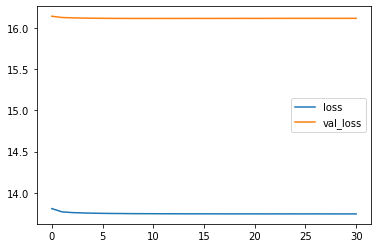

In [32]:
loss = pd.DataFrame(model.history.history)

loss.plot()

In [33]:
test_predictions = model.predict(X_test)

In [34]:
test_predictions = pd.Series(test_predictions.reshape(1752,))

pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [35]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

,Test True Y,Model Predictions
0,2.335461,0.109848
1,0.574713,0.109848
2,0.000000,0.109848
3,-1.503758,0.109848
4,-0.269905,0.109848
...,...,...
1747,-1.422109,0.109848
1748,0.355613,0.107926
1749,3.448276,0.109848
1750,-1.041667,0.109848


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

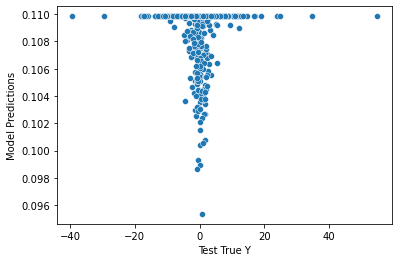

In [36]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

2.4305428047614757

In [38]:
#ADX = talib.ADX(High, Low, Close, timeperiod=3)

#ADX = pd.DataFrame(ADX[34:])

#ADX.columns = ['ADX 2']

#Mod = pd.concat([Mod,ADX],axis=1)

#Mod

In [39]:
#APO = talib.APO(data['Open'], slowperiod = 3, fastperiod = 2, matype = 1 )

#APO = pd.DataFrame(APO[34:])

#APO.columns = ['APO']

#Mod = pd.concat([Mod,APO],axis=1)

#Mod

In [40]:
BOP = talib.BOP(Open, High, Low, Close)

BOP = pd.DataFrame(BOP[34:])

BOP.columns = ['BOP']

Mod = pd.concat([Mod,BOP],axis=1)

Mod

,ROC,RSI,MFI 2,MFI 3,BOP
Date,,,,,
1998-07-22,1.063830,78.329799,1.071224e-14,3.919543e+01,0.428571
1998-07-23,-2.631579,22.037117,8.020899e-15,8.020899e-15,-1.000000
1998-07-24,-3.783784,7.315821,5.923841e-15,3.814457e-15,-0.750000
1998-07-27,-2.808989,3.743413,4.362044e-15,3.837689e-15,-0.500000
1998-07-28,0.578035,19.472459,5.428911e+01,3.222161e+01,-0.400000
...,...,...,...,...,...
2021-09-24,-2.015653,49.923042,5.673426e+01,7.080249e+01,-0.378788
2021-09-27,2.117039,72.916505,4.943704e+01,6.959590e+01,0.604655
2021-09-28,-3.070604,30.894747,4.865934e+01,3.248991e+01,-0.627118


In [41]:
Mod.corr()['ROC'].sort_values()

MFI 3    0.309111
MFI 2    0.380536
RSI      0.599256
BOP      0.675080
ROC      1.000000
Name: ROC, dtype: float64

In [42]:
BOP2 = talib.BOP(Open[33:5670], High[33:5670], Low[33:5670], Close[33:5670]).values

BOP2 = pd.DataFrame(BOP2)

BOP2.columns = ['BOP 2']

BOP2

,BOP 2
0,-1.000000
1,0.428571
2,-1.000000
3,-0.750000
4,-0.500000
...,...
5632,0.429224
5633,-0.133332
5634,-0.271111
5635,-0.103896


In [52]:
test = pd.DataFrame(hzo.history(start="1998-7-22", end="2021-09-30", interval="1d").values)

test

,0,1,2,3,4,5,6
0,11.687500,12.000000,11.562500,11.875000,23000.0,0.0,0.0
1,11.937500,11.937500,11.562500,11.562500,7800.0,0.0,0.0
2,11.500000,11.500000,11.000000,11.125000,35700.0,0.0,0.0
3,11.000000,11.000000,10.625000,10.812500,24700.0,0.0,0.0
4,11.000000,11.125000,10.812500,10.875000,29000.0,0.0,0.0
...,...,...,...,...,...,...,...
5831,50.419998,52.000000,50.299999,51.099998,285800.0,0.0,0.0
5832,50.570000,51.369999,50.049999,50.070000,220700.0,0.0,0.0
5833,50.349998,51.599998,50.310001,51.130001,213600.0,0.0,0.0
5834,51.040001,51.740002,49.380001,49.560001,228900.0,0.0,0.0


In [53]:
test2 = pd.concat([test,BOP2],axis=1)



test2

,0,1,2,3,4,5,6,BOP 2
0,11.687500,12.000000,11.562500,11.875000,23000.0,0.0,0.0,-1.000000
1,11.937500,11.937500,11.562500,11.562500,7800.0,0.0,0.0,0.428571
2,11.500000,11.500000,11.000000,11.125000,35700.0,0.0,0.0,-1.000000
3,11.000000,11.000000,10.625000,10.812500,24700.0,0.0,0.0,-0.750000
4,11.000000,11.125000,10.812500,10.875000,29000.0,0.0,0.0,-0.500000
...,...,...,...,...,...,...,...,...
5831,50.419998,52.000000,50.299999,51.099998,285800.0,0.0,0.0,NaN
5832,50.570000,51.369999,50.049999,50.070000,220700.0,0.0,0.0,NaN
5833,50.349998,51.599998,50.310001,51.130001,213600.0,0.0,0.0,NaN
5834,51.040001,51.740002,49.380001,49.560001,228900.0,0.0,0.0,NaN
